In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [30]:
file = "resultados01.csv"
df = pd.read_csv(file)

df.head(10)

,n_entradas,grasp_pr,t_grasp_pr,grasp,t_grasp
0,100,9147.0,0.000,8940.0,15.625
1,100,9147.0,15.625,8940.0,0.000
2,100,9147.0,15.625,8940.0,0.000
3,100,9147.0,15.625,8940.0,0.000
4,100,9147.0,15.625,8940.0,0.000
5,200,11238.0,31.250,11227.0,15.625
6,200,11238.0,31.250,11227.0,15.625
7,200,11238.0,31.250,11238.0,31.250
8,200,11238.0,31.250,11238.0,31.250
9,200,11238.0,31.250,11238.0,31.250


In [47]:
instances = []
values = ['100', '200', '500', '1000', '2000', '5000', '10000']

for value in values:
    instances.append(df[df['n_entradas'].isin([value])]) 
instances[0]


,n_entradas,grasp_pr,t_grasp_pr,grasp,t_grasp
0,100,9147.0,0.000,8940.0,15.625
1,100,9147.0,15.625,8940.0,0.000
2,100,9147.0,15.625,8940.0,0.000
3,100,9147.0,15.625,8940.0,0.000
4,100,9147.0,15.625,8940.0,0.000


In [230]:
# data = {'Name':['Tom', 'nick', 'krish', 'jack'], 'Age':[20, 21, 19, 18]} 
grasp_pr_mean = []
grasp_pr_time = []

grasp_mean = []
grasp_time = []

otimos_value = [9147, 11238, 28857, 54503, 110625, 276457, 563647]

for instancia in instances:
    grasp_pr_mean.append(np.mean(instancia['grasp_pr']))
    grasp_pr_time.append(np.mean(instancia['t_grasp_pr']))

    grasp_mean.append(np.mean(instancia['grasp']))
    grasp_time.append(np.mean(instancia['t_grasp']))


grasp_pr = {'entradas': values, 'fo_media': grasp_pr_mean, 'time_media': grasp_pr_time}
df_grasp_pr = pd.DataFrame(grasp_pr) 
df_grasp_pr

grasp = {'entradas': values, 'fo_media': grasp_mean, 'time_media': grasp_time}
df_grasp = pd.DataFrame(grasp) 
df_grasp


otimos = {'entradas': values, 'fo_media': otimos_value }
df_otimos = pd.DataFrame(otimos) 
df_otimos

df_grasp_vs_grasp_pr = {'entradas': values, 'grasp': grasp_mean, 'grasp_pr': grasp_pr_mean}
df_group = pd.DataFrame(df_grasp_vs_grasp_pr) 


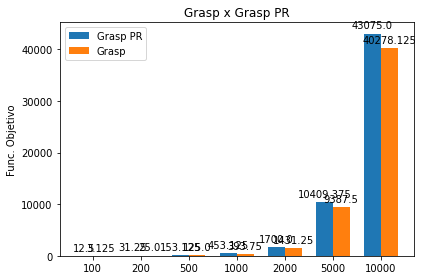

In [94]:
# labels = ['2016', '2017', '2018', '2019', '2020']
x = np.arange(len(values))

width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_grasp_pr['time_media'], width, label='Grasp PR')
rects2 = ax.bar(x + width/2, df_grasp['time_media'], width, label='Grasp')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Func. Objetivo')
ax.set_title('Grasp x Grasp PR')
ax.set_xticks(x)
ax.set_xticklabels(values)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.savefig("fo_media.png")    

In [95]:
def PlotGenGraph(values, array):
    fig, ax = plt.subplots()
    ax.plot(values, array)

    ax.set(xlabel='Generation', ylabel='Avarege Fitness',
    title='Avarege Fitness over generation')
    ax.grid()

    fig.savefig("test.png")
    plt.show()   
        

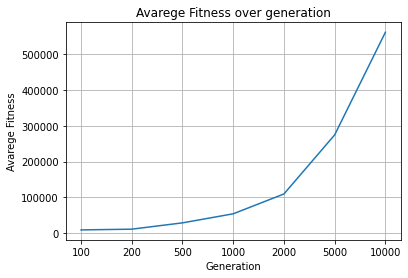

In [134]:
PlotGenGraph(values,  df_grasp_pr['fo_media'])

In [144]:
def PlotTime(dfs):
    fig, ax = plt.subplots()
    for df in dfs:
        # png_label = file.split('.csv')
        x= df['entradas']
        y= df['time_media']
        ax.plot(x,y)
    ax.set(xlabel='Entradas', ylabel='FO Média',
    title='Grasp x Grasp Pr (Tempo)')
    ax.grid()
    ax.legend(['Grasp PR', 'Grasp'])

    fig.savefig("plot_time.png")    
    
    plt.show()

  entradas  fo_media  time_media
0      100    9147.0      12.500
1      200   11238.0      31.250
2      500   28834.0     153.125
3     1000   54112.2     453.125
4     2000  109484.8    1700.000
5     5000  274375.2   10409.375
6    10000  560699.4   43075.000
  entradas  fo_media  time_media
0      100    8940.0       3.125
1      200   11233.6      25.000
2      500   28792.6     125.000
3     1000   54038.4     393.750
4     2000  110030.4    1431.250
5     5000  274956.2    9387.500
6    10000  560602.8   40278.125


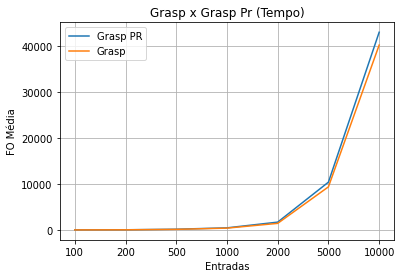

In [145]:
PlotTime([df_grasp_pr, df_grasp])

In [256]:

def PlotMedia(dfs, legenda):
    fig, ax = plt.subplots()
    index = 0
    for df in dfs:
        x= df['entradas']
        y= df['fo_media']
        if index == 0:
            ax.plot(x,y, 'b-')
        elif index == 1:
            ax.plot(x,y, 'bo')
        else: 
            ax.plot(x,y, 'r--')
        index+=1
    ax.set(xlabel='Entradas', ylabel='FO Média',
    title='Grasp x Grasp Pr (FO Media)')
    ax.grid()
    ax.legend(legenda)

    fig.savefig("plot_time.png")    
    
    plt.show()

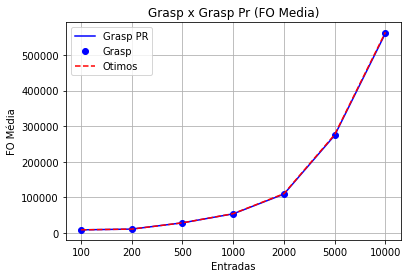

In [257]:
PlotMedia([df_grasp_pr, df_grasp, df_otimos], ['Grasp PR', 'Grasp', 'Otimos'])